## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error

In [2]:
# Load the dataset
df = pd.read_csv('../../Data/pre_DOGE-USD.csv')
data = df['Close'].values.reshape(-1, 1)

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-01,0.006042,0.006320,0.005945,0.006215,0.006215,15518400
1,2018-03-02,0.006174,0.006232,0.005447,0.005482,0.005482,22498100
2,2018-03-03,0.005494,0.005756,0.005181,0.005301,0.005301,21545000
3,2018-03-04,0.005234,0.005502,0.005164,0.005502,0.005502,12133500
4,2018-03-05,0.005462,0.005535,0.005157,0.005218,0.005218,13627700


In [4]:
df= df.drop(columns=["Open", "High", "Low", "Adj Close","Volume"])

In [5]:
df = df.rename(columns={'Close': 'Price'})
df = pd.DataFrame(data=df)

In [6]:
df

,Date,Price
0,2018-03-01,0.006215
1,2018-03-02,0.005482
2,2018-03-03,0.005301
3,2018-03-04,0.005502
4,2018-03-05,0.005218
...,...,...
2280,2024-05-28,0.164962
2281,2024-05-29,0.163695
2282,2024-05-30,0.159544
2283,2024-05-31,0.159136


In [7]:
# Chuyển đổi cột Date sang định dạng datetime64
df['Date'] = pd.to_datetime(df['Date'])

# Tạo cột Days_Since_Start và gán giá trị từ 1, 2, 3,...
df['Days_Since_Start'] = (df['Date'] - df['Date'].min()).dt.days + 1

# Kết quả
print(df)

           Date     Price  Days_Since_Start
0    2018-03-01  0.006215                 1
1    2018-03-02  0.005482                 2
2    2018-03-03  0.005301                 3
3    2018-03-04  0.005502                 4
4    2018-03-05  0.005218                 5
...         ...       ...               ...
2280 2024-05-28  0.164962              2281
2281 2024-05-29  0.163695              2282
2282 2024-05-30  0.159544              2283
2283 2024-05-31  0.159136              2284
2284 2024-06-01  0.160200              2285

[2285 rows x 3 columns]


In [8]:
y = df['Price'] 
X=df['Days_Since_Start'] 
X = pd.DataFrame(data=X)
y = pd.DataFrame(data=y)
# using the train test split function 8-2 
# X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104, test_size=0.3) 

split_index = int(len(X) * 0.9)

# Split the data by index
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [10]:

# Tính các chỉ số đánh giá
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test.values.flatten() - y_pred.flatten()) / y_test.values.flatten())) * 100

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape}%')

MAE: 0.043582467263772455
MSE: 0.002565042390955015
MAPE: 50.28279264114437%


c:\Users\kakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\kakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\kakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


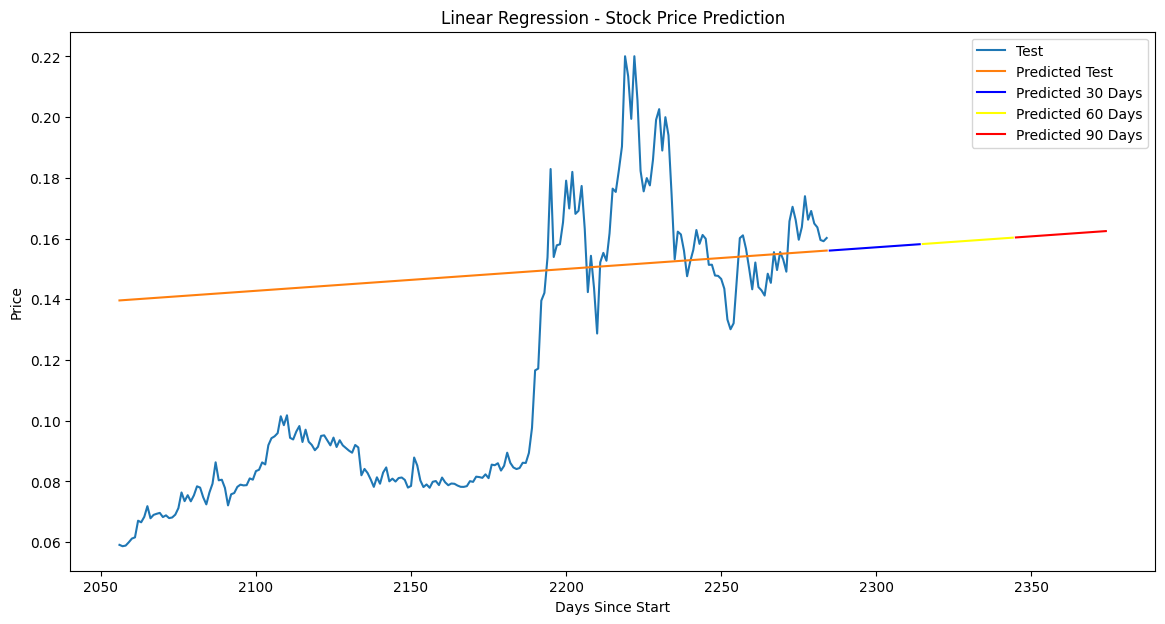

In [11]:
# Generate future date indices for 30, 60, and 90 days
future_index_30 = pd.RangeIndex(start=len(X_train) + len(X_test), stop=len(X_train) + len(X_test) + 30, step=1)
future_index_60 = pd.RangeIndex(start=len(X_train) + len(X_test) + 30, stop=len(X_train) + len(X_test) + 60, step=1)
future_index_90 = pd.RangeIndex(start=len(X_train) + len(X_test) + 60, stop=len(X_train) + len(X_test) + 90, step=1)

# Prepare the future dates in the same format as your training data
X_future_30 = pd.DataFrame(future_index_30)
X_future_60 = pd.DataFrame(future_index_60)
X_future_90 = pd.DataFrame(future_index_90)

# Predict the 'Price' for the future dates
y_pred_future_30 = model.predict(X_future_30)
y_pred_future_60 = model.predict(X_future_60)
y_pred_future_90 = model.predict(X_future_90)

plt.figure(figsize=(14, 7))
# Create index ranges for plotting
test_data_index = pd.RangeIndex(start=len(X_train), stop=len(X_train) + len(X_test), step=1)
# Plot the training, testing, and predicted test data
plt.plot(test_data_index, y_test, label='Test')
plt.plot(test_data_index, y_pred, label='Predicted Test')

# Plot the predicted future 'Price' values
plt.plot(future_index_30, y_pred_future_30, label='Predicted 30 Days', color='blue')
plt.plot(future_index_60, y_pred_future_60, label='Predicted 60 Days', color='yellow')
plt.plot(future_index_90, y_pred_future_90, label='Predicted 90 Days', color='red')

# Set the title and labels
plt.title('Linear Regression - Stock Price Prediction')
plt.xlabel('Days Since Start')
plt.ylabel('Price')

# Show legend
plt.legend()

# Display the plot
plt.show()

c:\Users\kakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\kakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\kakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


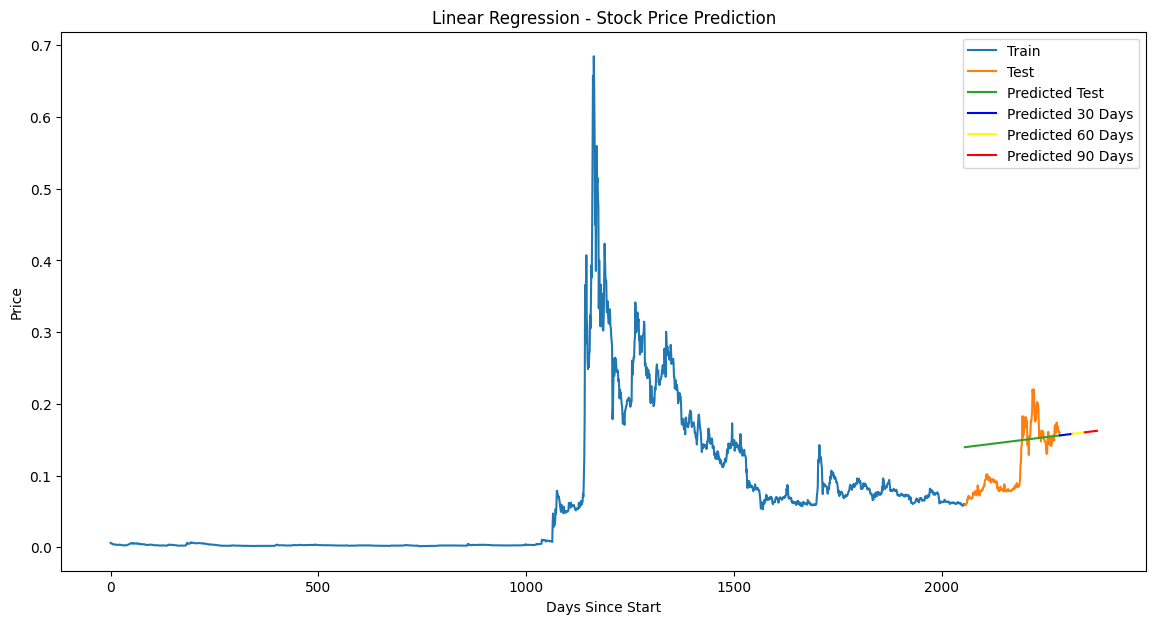

In [12]:
# Generate future date indices for 30, 60, and 90 days
future_index_30 = pd.RangeIndex(start=len(X_train) + len(X_test), stop=len(X_train) + len(X_test) + 30, step=1)
future_index_60 = pd.RangeIndex(start=len(X_train) + len(X_test) + 30, stop=len(X_train) + len(X_test) + 60, step=1)
future_index_90 = pd.RangeIndex(start=len(X_train) + len(X_test) + 60, stop=len(X_train) + len(X_test) + 90, step=1)

# Prepare the future dates in the same format as your training data
X_future_30 = pd.DataFrame(future_index_30)
X_future_60 = pd.DataFrame(future_index_60)
X_future_90 = pd.DataFrame(future_index_90)

# Predict the 'Price' for the future dates
y_pred_future_30 = model.predict(X_future_30)
y_pred_future_60 = model.predict(X_future_60)
y_pred_future_90 = model.predict(X_future_90)

plt.figure(figsize=(14, 7))
# Create index ranges for plotting
train_data_index = pd.RangeIndex(start=0, stop=len(X_train), step=1)
test_data_index = pd.RangeIndex(start=len(X_train), stop=len(X_train) + len(X_test), step=1)
# Plot the training, testing, and predicted test data
plt.plot(train_data_index, y_train, label='Train')
plt.plot(test_data_index, y_test, label='Test')
plt.plot(test_data_index, y_pred, label='Predicted Test')

# Plot the predicted future 'Price' values
plt.plot(future_index_30, y_pred_future_30, label='Predicted 30 Days', color='blue')
plt.plot(future_index_60, y_pred_future_60, label='Predicted 60 Days', color='yellow')
plt.plot(future_index_90, y_pred_future_90, label='Predicted 90 Days', color='red')

# Set the title and labels
plt.title('Linear Regression - Stock Price Prediction')
plt.xlabel('Days Since Start')
plt.ylabel('Price')

# Show legend
plt.legend()

# Display the plot
plt.show()

c:\Users\kakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\kakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\kakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


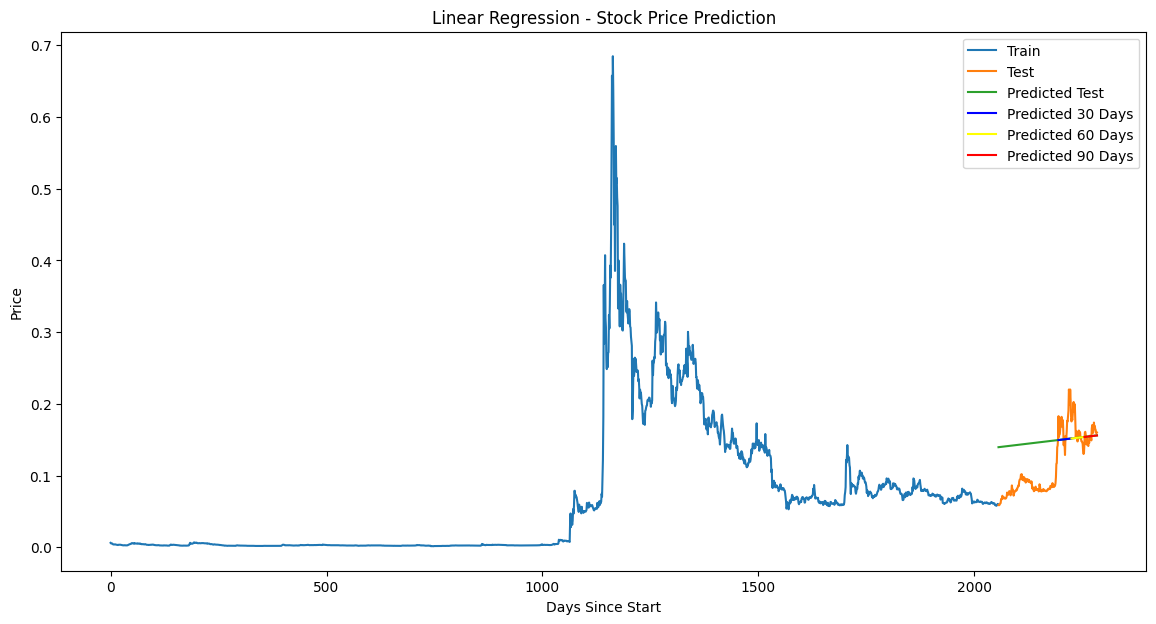

In [13]:
# Generate future date indices for 30, 60, and 90 days
future_index_30 = pd.RangeIndex(start=len(X_train) + len(X_test)-90, stop=len(X_train) + len(X_test) -60, step=1)
future_index_60 = pd.RangeIndex(start=len(X_train) + len(X_test) -60, stop=len(X_train) + len(X_test) -30, step=1)
future_index_90 = pd.RangeIndex(start=len(X_train) + len(X_test) -30, stop=len(X_train) + len(X_test), step=1)

# Prepare the future dates in the same format as your training data
X_future_30 = pd.DataFrame(future_index_30)
X_future_60 = pd.DataFrame(future_index_60)
X_future_90 = pd.DataFrame(future_index_90)

# Predict the 'Price' for the future dates
y_pred_future_30 = model.predict(X_future_30)
y_pred_future_60 = model.predict(X_future_60)
y_pred_future_90 = model.predict(X_future_90)

plt.figure(figsize=(14, 7))
# Create index ranges for plotting
train_data_index = pd.RangeIndex(start=0, stop=len(X_train), step=1)
test_data_index = pd.RangeIndex(start=len(X_train), stop=len(X_train) + len(X_test), step=1)
# Plot the training, testing, and predicted test data
plt.plot(train_data_index, y_train, label='Train')
plt.plot(test_data_index, y_test, label='Test')
plt.plot(test_data_index, y_pred, label='Predicted Test')

# Plot the predicted future 'Price' values
plt.plot(future_index_30, y_pred_future_30, label='Predicted 30 Days', color='blue')
plt.plot(future_index_60, y_pred_future_60, label='Predicted 60 Days', color='yellow')
plt.plot(future_index_90, y_pred_future_90, label='Predicted 90 Days', color='red')

# Set the title and labels
plt.title('Linear Regression - Stock Price Prediction')
plt.xlabel('Days Since Start')
plt.ylabel('Price')

# Show legend
plt.legend()

# Display the plot
plt.show()